In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import pandas as pd

# Folder containing the Excel files
folder_path = "ai_recruitment_data"  # Replace with your folder path

# List all Excel files in the folder
excel_files = [f for f in os.listdir(folder_path) if f.endswith(".xlsx")]

In [3]:
excel_files

['dataset6.xlsx',
 'dataset10.xlsx',
 'dataset7.xlsx',
 'dataset_1_2_3_combined.xlsx',
 'dataset4.xlsx',
 'dataset8.xlsx',
 'dataset9.xlsx',
 'dataset5.xlsx']

In [4]:
# Dictionary to store DataFrames
dataframes = {}

for file in excel_files:
    file_path = os.path.join(folder_path, file)
    dataframes[file] = pd.read_excel(file_path)
    print(f"Loaded {file} with shape {dataframes[file].shape}")

# Combine all DataFrames into one
combined_df = pd.concat(dataframes.values(), ignore_index=True)

Loaded dataset6.xlsx with shape (200, 8)
Loaded dataset10.xlsx with shape (205, 8)
Loaded dataset7.xlsx with shape (200, 8)
Loaded dataset_1_2_3_combined.xlsx with shape (1674, 10)
Loaded dataset4.xlsx with shape (500, 8)
Loaded dataset8.xlsx with shape (200, 8)
Loaded dataset9.xlsx with shape (200, 8)
Loaded dataset5.xlsx with shape (200, 8)


In [5]:
combined_df = combined_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [6]:
combined_df['length_of_transcript'] = combined_df['Transcript'].apply(lambda x: len(x) if isinstance(x, str) else 0)


In [7]:
combined_df

,ID,Name,Role,Transcript,Resume,Decision,Reason for decision,Job Description,Unnamed: 0,num_words_in_transcript,length_of_transcript
0,harima1,ishan,data scientist,"interviewer: hi ishan, thanks for applying for...",**ishan**\n**contact information:**\n\n* addre...,rejected,the candidate did not demonstrate strong compe...,looking for a skilled data scientist with at l...,NaN,NaN,2392
1,harima2,rajiv,data analyst,"**interviewer:** hi rajiv, thanks for coming i...",**rajiv**\n**contact information:**\n\n* ema...,selected,"strong expertise in python/r, dashboards creat...",seeking a talented data analyst with 4 years o...,NaN,NaN,4183
2,harima3,oliver,software engineer,"interviewer: hi oliver, thanks for taking the ...",**oliver**\n**software engineer**\n\n**contact...,selected,the combination of 5 years of experience and p...,seeking a talented software engineer with 5 ye...,NaN,NaN,5009
3,harima4,aarav,product manager,"**interviewer:** hi aarav, thank you for comin...",**aarav**\n**contact information:**\n\n* ema...,selected,"strong expertise in kpi monitoring, business s...",seeking a talented product manager with 8 year...,NaN,NaN,4958
4,harima5,sonia,software engineer,"interviewer: hi sonia, thanks for coming in to...",**sonia**\n**contact information:**\n\n* email...,rejected,the candidate lacked sufficient expertise in k...,looking for a skilled software engineer with a...,NaN,NaN,3671
...,...,...,...,...,...,...,...,...,...,...,...
3374,durgba196,pedro lara,data engineer,interview transcript: data engineer position\n...,pedro lara\ndata engineer\n\ncontact informati...,reject,showed lack of preparedness for typical interv...,skilled data engineer with expertise in ci/cd ...,NaN,NaN,3247
3375,durgba197,joseph jimenez,data scientist,data scientist interview with joseph jimenez\n...,joseph jimenez\ndata scientist\n\ncontact info...,select,showcased the ability to quickly adapt and lea...,skilled data scientist with expertise in data ...,NaN,NaN,3258
3376,durgba198,scott harvey,software engineer,"interviewer: rachel lee, senior software engin...",scott harvey\ncontact information:\n\n* email:...,select,demonstrated a strong understanding of the com...,skilled software engineer with expertise in ja...,NaN,NaN,2940
3377,durgba199,tami sharp,product manager,interview for product manager position\n\ninte...,tami sharp\nproduct manager\n\ncontact informa...,select,displayed excellent collaboration and teamwork...,skilled product manager with expertise in stak...,NaN,NaN,2807


In [8]:
print(combined_df['Decision'].unique())



['rejected' 'selected' 'select' 'reject']


In [9]:
combined_df['Decision'] = combined_df['Decision'].replace({
    'rejected': 'reject',
    'selected': 'select'
})
print(combined_df[['Decision', 'length_of_transcript']].head(10))  # Check if replace worked as expected


  Decision  length_of_transcript
0   reject                  2392
1   select                  4183
2   select                  5009
3   select                  4958
4   reject                  3671
5   reject                  3355
6   select                  3805
7   select                  4537
8   select                  4586
9   select                   537


In [10]:
print(combined_df.duplicated().sum())

0


In [11]:
print(combined_df['length_of_transcript'].isna().sum())  # Check for missing values
print(combined_df[combined_df['length_of_transcript'] <= 0])  # Check for unexpected values


0
Empty DataFrame
Columns: [ID, Name, Role, Transcript, Resume, Decision, Reason for decision, Job Description, Unnamed: 0, num_words_in_transcript, length_of_transcript]
Index: []


In [12]:
# Replace 'rejected' with 'reject' and 'selected' with 'select'
combined_df['Decision'] = combined_df['Decision'].replace({
    'rejected': 'reject',
    'selected': 'select'
})

# Inspect the first few rows to confirm the replacement
print(combined_df[['Decision', 'length_of_transcript']].head(10))


  Decision  length_of_transcript
0   reject                  2392
1   select                  4183
2   select                  5009
3   select                  4958
4   reject                  3671
5   reject                  3355
6   select                  3805
7   select                  4537
8   select                  4586
9   select                   537


In [13]:
combined_df[['length_of_transcript','Decision']].groupby('Decision').mean()

,length_of_transcript
Decision,
reject,3973.673123
select,4763.420382


In [14]:
combined_df['num_words_in_transcript'] = combined_df['Transcript'].apply(lambda x: len(str(x).split()))

In [15]:
combined_df[['num_words_in_transcript','Decision','Role']].groupby(['Role','Decision']).agg({'mean','median','std'})

num_words_in_transcript               \
                                                          std         mean   
Role                         Decision                                        
ai engineer                  reject                 18.212633   567.200000   
                             select                204.121419   659.125000   
business analyst             reject                110.323615   616.400000   
                             select                 54.802980   693.833333   
cloud architect              reject                 76.906870   587.000000   
                             select                 19.670197   802.250000   
content writer               reject                 61.554854   529.000000   
                             select                 30.405592   684.500000   
cybersecurity analyst        reject                290.082747   882.000000   
                             select                192.659070   867.964286   
cybersecurity specialist     reject                123.835375   636.000000   
                             select                 77.929455   704.000000   
data analyst                 reject                120.178618   688.142857   
                             select                137.592864   783.520548   
data engineer                reject                119.032443   638.782443   
                             select                128.361485   743.751055   
data scientist               reject                114.073092   649.795222   
                             select                133.971428   735.020979   
database administrator       reject                 73.432509   554.333333   
                             select                 87.793887   726.833333   
devops engineer              reject                276.103946   844.500000   
                             select                172.556657   830.166667   
digital marketing specialist reject                 43.657760   639.000000   
                             select                 72.875083   701.444444   
game developer               reject                179.199144   447.333333   
                             select                311.369020   444.000000   
graphic designer             reject                 61.207930   541.125000   
                             select                 63.439510   683.714286   
hr specialist                reject                 66.817413   657.166667   
                             select                 94.219779   745.833333   
machine learning engineer    reject                216.892121   813.769231   
                             select                193.602552   937.275000   
mobile app developer         reject                 88.803153   621.000000   
                             select                 11.372481   649.333333   
network engineer             reject                 92.458699   553.888889   
                             select                 60.419171   766.857143   
product manager              reject                115.093657   631.911877   
                             select                142.763279   760.297794   
project manager              reject                 92.922439   695.833333   
                             select                 82.964084   739.843750   
software developer           reject                126.307029   674.461538   
                             select                 85.288800   693.555556   
software engineer            reject                151.808193   628.033333   
                             select                144.888807   728.525000   
system administrator         reject                 48.280431   559.000000   
                             select                  7.778175   761.500000   
ui designer                  reject                124.724961   707.649573   
                             select                108.505000   770.715596   
ui engineer                  reject                106.77829

In [16]:
combined_df[['num_words_in_transcript','Decision']].groupby(['Decision']).mean()

,num_words_in_transcript
Decision,
reject,646.306901
select,752.750434


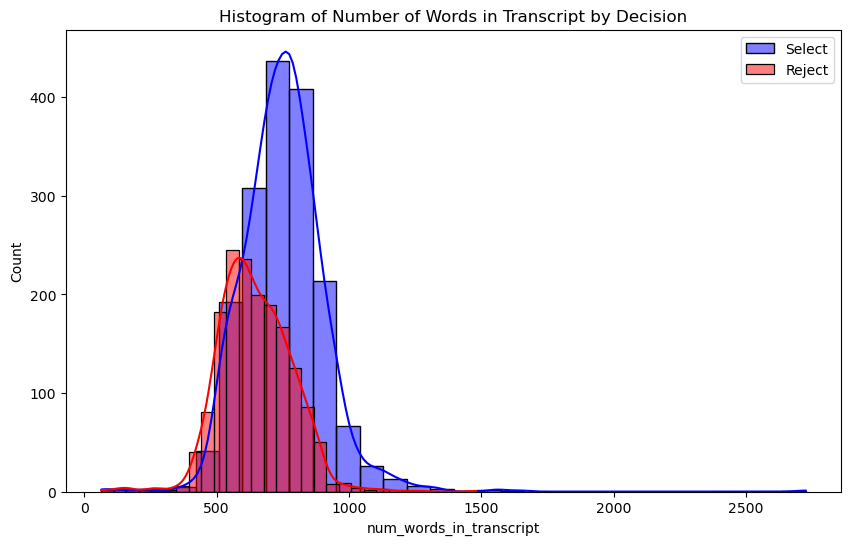

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_df[combined_df['Decision'] == 'select']['num_words_in_transcript'], kde=True, color='blue', label='Select', bins=30)
sns.histplot(combined_df[combined_df['Decision'] == 'reject']['num_words_in_transcript'], kde=True, color='red', label='Reject', bins=30)
plt.legend()
plt.title('Histogram of Number of Words in Transcript by Decision')
plt.show()


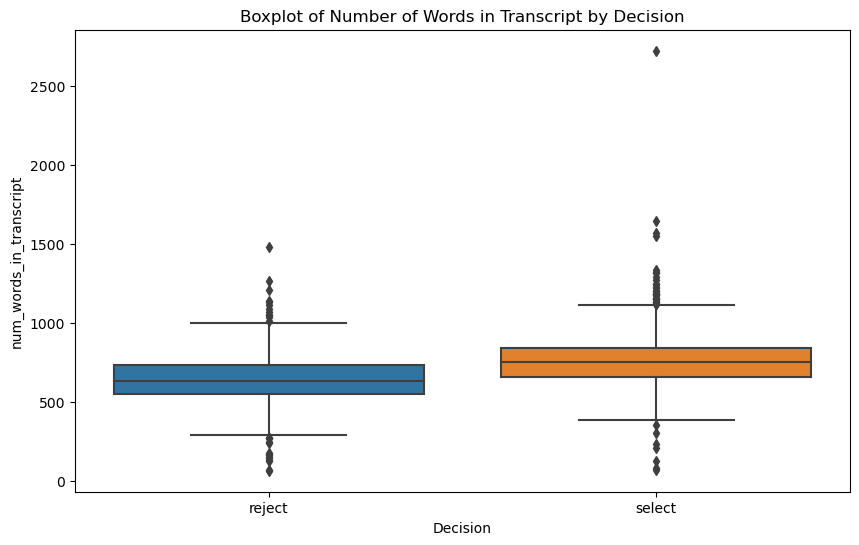

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for 'select' and 'reject' based on 'num_words_in_transcript'
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Decision', y='num_words_in_transcript')
plt.title('Boxplot of Number of Words in Transcript by Decision')
plt.show()


In [19]:
from nltk.corpus import stopwords
import nltk
import re

In [20]:
'''nltk.download('stopwords')
stop_words=set(stopwords.words('english'))'''

"nltk.download('stopwords')\nstop_words=set(stopwords.words('english'))"

In [31]:
import pandas as pd
from textblob import TextBlob

# Function to calculate sentiment score
def get_sentiment(text):
    """Calculates the sentiment polarity score of the given text."""
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Sample DataFrame (replace this with your actual 'combined_df')
# Assuming 'combined_df' has columns 'Transcript', 'Resume', 'Role', and 'Decision'

# Calculate sentiment score for Transcript and Resume
combined_df['Transcript_Sentiment_Score'] = combined_df['Transcript'].apply(get_sentiment)
combined_df['Resume_Sentiment_Score'] = combined_df['Resume'].apply(get_sentiment)

# Now, we can group by 'Role' and 'Decision' and calculate the mean and median of the sentiment scores
sentiment_stats = combined_df.groupby(['Role', 'Decision'])[['Transcript_Sentiment_Score', 'Resume_Sentiment_Score']].agg(['mean', 'median'])

# Display the results
print(sentiment_stats)


                                      Transcript_Sentiment_Score            \
                                                            mean    median   
Role                         Decision                                        
ai engineer                  reject                     0.220139  0.211310   
                             select                     0.196363  0.179128   
business analyst             reject                     0.201420  0.210393   
                             select                     0.213139  0.223007   
cloud architect              reject                     0.187567  0.188558   
                             select                     0.206401  0.195503   
content writer               reject                     0.246620  0.250347   
                             select                     0.270537  0.270537   
cybersecurity analyst        reject                     0.137466  0.118027   
                             select                     0.178755

In [34]:
import pandas as pd
from textblob import TextBlob

# Function to calculate sentiment score
def get_sentiment(text):
    """Calculates the sentiment polarity score of the given text."""
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Sample DataFrame (replace this with your actual 'combined_df')
# Assuming 'combined_df' has columns 'Transcript', 'Resume', 'Role', and 'Decision'

# Calculate sentiment score for Transcript and Resume
combined_df['Transcript_Sentiment_Score'] = combined_df['Transcript'].apply(get_sentiment)
combined_df['Resume_Sentiment_Score'] = combined_df['Resume'].apply(get_sentiment)

# Combine the sentiment scores: we will calculate both sum and average
combined_df['Combined_Sentiment_Score_Sum'] = combined_df['Transcript_Sentiment_Score'] + combined_df['Resume_Sentiment_Score']
combined_df['Combined_Sentiment_Score_Avg'] = (combined_df['Transcript_Sentiment_Score'] + combined_df['Resume_Sentiment_Score']) / 2

# Now, we can group by 'Role' and 'Decision' and calculate the mean and median of the combined sentiment scores
sentiment_stats = combined_df.groupby(['Role', 'Decision'])[['Combined_Sentiment_Score_Sum', 'Combined_Sentiment_Score_Avg']].agg(['mean', 'median'])

# Display the results
print(sentiment_stats)


                                      Combined_Sentiment_Score_Sum            \
                                                              mean    median   
Role                         Decision                                          
ai engineer                  reject                       0.280065  0.310738   
                             select                       0.294382  0.294528   
business analyst             reject                       0.338331  0.322476   
                             select                       0.381928  0.360184   
cloud architect              reject                       0.314312  0.272030   
                             select                       0.312919  0.293239   
content writer               reject                       0.455389  0.457087   
                             select                       0.397651  0.397651   
cybersecurity analyst        reject                       0.248754  0.232519   
                             select     

In [43]:
import pandas as pd
from textblob import TextBlob

# Function to calculate sentiment score
def get_sentiment(text):
    """Calculates the sentiment polarity score of the given text."""
    blob = TextBlob(str(text))  # Ensure text is string
    return blob.sentiment.polarity  # Returns a score between -1 (negative) and 1 (positive)

# Example DataFrame (replace with your actual 'combined_df')
data = {
    'Reason for decision': ['Great candidate', 'Needs improvement', 'Perfect fit for the role', 'Unfit for the position'],
    'Job Description': ['Looking for a skilled developer', 'Looking for a developer with experience', 'Looking for an experienced manager', 'Looking for a fresh graduate']
}

combined_df = pd.DataFrame(data)

# Sentiment Analysis for 'Reason for Decision' and 'Job Description'
combined_df['Reason_Sentiment_Score'] = combined_df['Reason for decision'].apply(get_sentiment)
combined_df['Job_Description_Sentiment_Score'] = combined_df['Job Description'].apply(get_sentiment)

# Combine the sentiment scores (Sum or Average) for these fields
combined_df['Combined_Reason_Sentiment_Score'] = combined_df['Reason_Sentiment_Score'] + combined_df['Job_Description_Sentiment_Score']
combined_df['Combined_Reason_Sentiment_Avg'] = (combined_df['Reason_Sentiment_Score'] + combined_df['Job_Description_Sentiment_Score']) / 2

# Print the result
print(combined_df[['Reason for decision', 'Reason_Sentiment_Score', 
                   'Job Description', 'Job_Description_Sentiment_Score', 
                   'Combined_Reason_Sentiment_Score', 'Combined_Reason_Sentiment_Avg']])


        Reason for decision  Reason_Sentiment_Score  \
0           Great candidate                     0.8   
1         Needs improvement                     0.0   
2  Perfect fit for the role                     0.7   
3    Unfit for the position                     0.0   

                           Job Description  Job_Description_Sentiment_Score  \
0          Looking for a skilled developer                              0.5   
1  Looking for a developer with experience                              0.0   
2       Looking for an experienced manager                              0.8   
3             Looking for a fresh graduate                              0.3   

   Combined_Reason_Sentiment_Score  Combined_Reason_Sentiment_Avg  
0                              1.3                           0.65  
1                              0.0                           0.00  
2                              1.5                           0.75  
3                              0.3                      

In [42]:
# Assuming you already have 'Transcript_Sentiment_Score', 'Resume_Sentiment_Score', 'Reason_Sentiment_Score', 
# and 'Job_Description_Sentiment_Score' columns in 'combined_df'.

# Calculate the Total Sentiment Score by summing all the sentiment scores
combined_df['Total_Sentiment_Score'] = (combined_df['Transcript_Sentiment_Score'] +
                                         combined_df['Resume_Sentiment_Score'] +
                                         combined_df['Reason_Sentiment_Score'] +
                                         combined_df['Job_Description_Sentiment_Score'])

# Calculate the Average Sentiment Score by averaging all the sentiment scores
combined_df['Average_Sentiment_Score'] = (combined_df['Transcript_Sentiment_Score'] +
                                           combined_df['Resume_Sentiment_Score'] +
                                           combined_df['Reason_Sentiment_Score'] +
                                           combined_df['Job_Description_Sentiment_Score']) / 4

# Print the result
print(combined_df[['Transcript_Sentiment_Score', 'Resume_Sentiment_Score', 
                   'Reason_Sentiment_Score', 'Job_Description_Sentiment_Score', 
                   'Total_Sentiment_Score', 'Average_Sentiment_Score']].head())


   Transcript_Sentiment_Score  Resume_Sentiment_Score  Reason_Sentiment_Score  \
0                    0.267500                0.092481                0.144444   
1                    0.197693                0.002698                0.408333   
2                    0.265218                0.235139                0.750000   
3                    0.165190                0.133566                0.408333   
4                    0.226443                0.167703                0.000000   

   Job_Description_Sentiment_Score  Total_Sentiment_Score  \
0                             0.20               0.704426   
1                             0.35               0.958725   
2                             0.35               1.600357   
3                             0.35               1.057090   
4                             0.20               0.594147   

   Average_Sentiment_Score  
0                 0.176106  
1                 0.239681  
2                 0.400089  
3                 0.264272  
4

In [38]:
# Calculate word count for 'Reason for Decision' and 'Job Description'
# Calculate word count for 'Reason for Decision' and 'Job Description'
combined_df['Reason_word_count'] = combined_df['Reason for decision'].apply(lambda x: len(str(x).split()))
combined_df['Job_Description_word_count'] = combined_df['Job Description'].apply(lambda x: len(str(x).split()))

# Correlation between word count and sentiment score, grouped by 'Decision'
reason_sentiment_corr = combined_df.groupby('Decision')[['Reason_word_count', 'Reason_Sentiment_Score']].corr().iloc[0::2, -1]
job_desc_sentiment_corr = combined_df.groupby('Decision')[['Job_Description_word_count', 'Job_Description_Sentiment_Score']].corr().iloc[0::2, -1]

print("Reason Sentiment Correlation by Decision:")
print(reason_sentiment_corr)

print("\nJob Description Sentiment Correlation by Decision:")
print(job_desc_sentiment_corr)


Reason Sentiment Correlation by Decision:
Decision                   
reject    Reason_word_count    0.053641
select    Reason_word_count    0.169184
Name: Reason_Sentiment_Score, dtype: float64

Job Description Sentiment Correlation by Decision:
Decision                            
reject    Job_Description_word_count   -0.025333
select    Job_Description_word_count   -0.326092
Name: Job_Description_Sentiment_Score, dtype: float64
